In [67]:
!pip install tensorflow==2.0.0b1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0b1
ERROR: No matching distribution found for tensorflow==2.0.0b1


In [68]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [69]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [70]:
import wget

In [71]:
wget.download('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',
               'daily-min-temperatures.csv')

'daily-min-temperatures (2).csv'

In [72]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


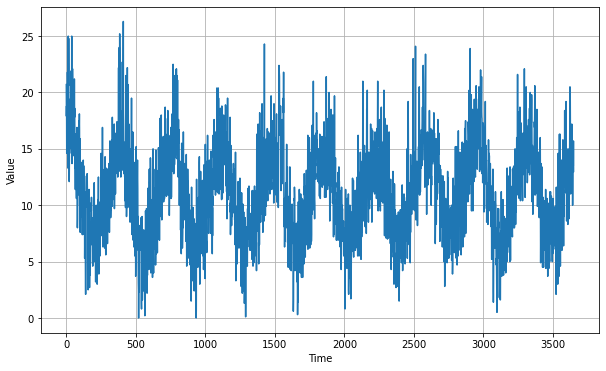

In [73]:
import csv
time_step = []
temps = []

with open('daily-min-temperatures.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [74]:
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000



In [75]:
time_train

array([   0,    1,    2, ..., 2497, 2498, 2499])

In [76]:
ds = tf.data.Dataset.from_tensor_slices(time_train)
ds = ds.window(window_size + 1, shift=1, drop_remainder=True)

In [77]:
for window in ds:
  print(list(window.as_numpy_iterator()))

 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430]
[1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431]
[1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432]
[1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433]
[1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434]
[1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430

In [78]:
ds = ds.flat_map(lambda w: w.batch(window_size + 1))
for e in ds:
    print(e)


 1482 1483 1484], shape=(31,), dtype=int32)
tf.Tensor(
[1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468
 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482
 1483 1484 1485], shape=(31,), dtype=int32)
tf.Tensor(
[1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469
 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483
 1484 1485 1486], shape=(31,), dtype=int32)
tf.Tensor(
[1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470
 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484
 1485 1486 1487], shape=(31,), dtype=int32)
tf.Tensor(
[1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471
 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488], shape=(31,), dtype=int32)
tf.Tensor(
[1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472
 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486
 1487 1488 148

In [79]:
ds = ds.map(lambda w: (w[:-1], w[1:]))

next(iter(ds))

(<tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])>,
 <tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])>)

In [80]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [81]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [82]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
  #                     strides=1, padding="causal",
  #                     activation="relu",
  #                     input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])




<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)
Epoch 1/100
10/10 [==============================] - 5s 29ms/step - loss: 31.0247 - mae: 31.5231
Epoch 2/100
10/10 [==============================] - 0s 32ms/step - loss: 30.7225 - mae: 31.2208
Epoch 3/100
10/10 [==============================] - 0s 31ms/step - loss: 29.8586 - mae: 30.3567
Epoch 4/100
10/10 [==============================] - 0s 31ms/step - loss: 28.6952 - mae: 29.1930
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 27.2282 - mae: 27.7256
Epoch 6/100
10/10 [==============================] - 0s 31ms/step - loss: 25.6872 - mae: 26.1843
Epoch 7/100
10/10 [==============================] - 0s 32ms/step - loss: 23.9732 - mae: 24.4700
Epoch 8/100
10/10 [==============================] - 0s 32ms/step - loss: 21.2962 - mae: 21.7924
Epoch 9/100
10/10 [==============================] - 0s 32ms/step - loss: 18.1737 - mae: 18.6689
Epoch 10/100
10/10 [=====

(1e-08, 0.0001, 0.0, 60.0)

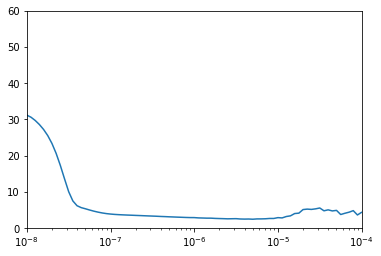

In [83]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [84]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=150)

Epoch 1/150
25/25 [==============================] - 5s 18ms/step - loss: 16.0391 - mae: 16.5312
Epoch 2/150
25/25 [==============================] - 1s 17ms/step - loss: 2.8664 - mae: 3.3337
Epoch 3/150
25/25 [==============================] - 1s 17ms/step - loss: 2.5050 - mae: 2.9679
Epoch 4/150
25/25 [==============================] - 1s 18ms/step - loss: 2.4095 - mae: 2.8723
Epoch 5/150
25/25 [==============================] - 1s 17ms/step - loss: 2.5060 - mae: 2.9686
Epoch 6/150
25/25 [==============================] - 1s 16ms/step - loss: 2.5660 - mae: 3.0308
Epoch 7/150
25/25 [==============================] - 1s 17ms/step - loss: 2.3816 - mae: 2.8423
Epoch 8/150
25/25 [==============================] - 1s 17ms/step - loss: 2.4944 - mae: 2.9582
Epoch 9/150
25/25 [==============================] - 1s 17ms/step - loss: 2.3662 - mae: 2.8265
Epoch 10/150
25/25 [==============================] - 1s 17ms/step - loss: 2.3942 - mae: 2.8555
Epoch 11/150
25/25 [===========================

In [85]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

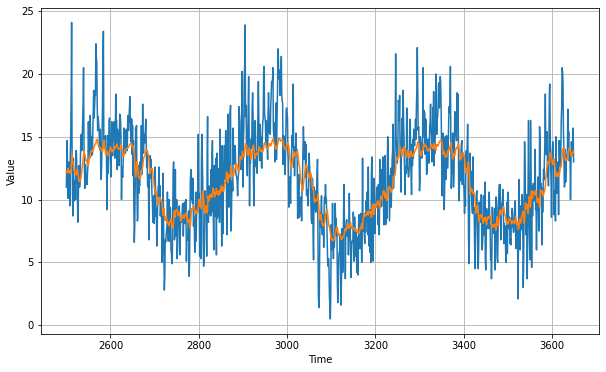

In [86]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [87]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

2.038277

In [88]:
print(rnn_forecast)

[12.128157 12.237919 12.193696 ... 13.760048 13.750708 13.881861]
